## [Importing and mapping reanalysis data with xarray and cartopy](https://nbviewer.jupyter.org/github/mccrayc/tutorials/blob/master/2_reanalysis/CFSR_Data_Tutorial.ipynb)

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
plt.rcParams['figure.figsize'] = (12, 12)

/public/home/hysplit/software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/public/home/hysplit/software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
dataFile = '../ERA-Int_5pl_20150425.nc'
#Open the dataset and print out metadeta
ds = xr.open_dataset(dataFile)
print(ds)

<xarray.Dataset>
Dimensions:    (latitude: 721, level: 5, longitude: 1440, time: 4)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 1.0 1.25 1.5 1.75 2.0 ...
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 89.0 88.75 88.5 ...
  * level      (level) int32 500 700 850 925 1000
  * time       (time) datetime64[ns] 2015-04-25 2015-04-25T06:00:00 ...
Data variables:
    z          (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    r          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2018-12-30 13:37:52 GMT by grib_to_netcdf-2.9.2: grib_to_ne...


In [3]:
lat = ds['latitude']
lon = ds['longitude']
lons, lats = np.meshgrid(lon, lat)

In [3]:
ds['time']

<xarray.DataArray 'time' (time: 4)>
array(['2015-04-25T00:00:00.000000000', '2015-04-25T06:00:00.000000000',
       '2015-04-25T12:00:00.000000000', '2015-04-25T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-04-25 2015-04-25T06:00:00 ...
Attributes:
    long_name:  time

In [4]:
ds.sel(time=('2015-04-25T06:00:00'), level=500)

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 1.0 1.25 1.5 1.75 2.0 ...
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 89.0 88.75 88.5 ...
    level      int32 500
    time       datetime64[ns] 2015-04-25T06:00:00
Data variables:
    z          (latitude, longitude) float32 ...
    q          (latitude, longitude) float32 ...
    t          (latitude, longitude) float32 ...
    r          (latitude, longitude) float32 ...
    u          (latitude, longitude) float32 ...
    v          (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2018-12-30 13:37:52 GMT by grib_to_netcdf-2.9.2: grib_to_ne...

In [5]:
hgt=ds.z.sel(time=('2015-04-25T06:00:00'), level=500)

In [6]:
hgt

<xarray.DataArray 'z' (latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 1.0 1.25 1.5 1.75 2.0 ...
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 89.0 88.75 88.5 ...
    level      int32 500
    time       datetime64[ns] 2015-04-25T06:00:00
Attributes:
    units:          m**2 s**-2
    long_name:      Geopotential
    standard_name:  geopotential

### Mapping with cartopy
Cartopy makes mapping fairly intuitive and easy! First, we define our coordinate reference system (ccrs) and choose a projection from those available. We then create a figure and pass the chosen projection information to it (in this case, a Lambert Conformal conic projection) to create what's known as a GeoAxes instance. This is where we'll map all of our data. We can use set_extent to zoom in on a certain lat/lon box.

We can then quickly add various features to the map, including a land background, lakes, country/state/provincial borders, etc.

Here, I've set this all up as a function plotMap() which, when run, will create and return a figure with a background map on which to plot without the need to copy/paste all of this code each time.

Note that I've added a zorder argument to some features. zorder tells matplotlib where to draw the feature relative to the other parts of the plot, with 0 being the bottommost layer and increasing values being closer to the top layer of the figure.

In [41]:
def plotMap():
    #Set the projection information
    proj = ccrs.LambertConformal(central_longitude=83.6,central_latitude=39, standard_parallels=[53])
    #Create a figure with an axes object on which we will plot. Pass the projection to that axes.
    fig, ax = plt.subplots(subplot_kw=dict(projection=proj))
    
    #Zoom in
    ax.set_extent([40, 130, 10, 90])# TaZhong:83.63,39.04
    
    #Add map features
    ax.add_feature(cfeature.LAND, facecolor='0.9') #Grayscale colors can be set using 0 (black) to 1 (white)
    ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.BORDERS, zorder=10)
    ax.add_feature(cfeature.COASTLINE, zorder=10)
    #ax.set_xticks([60, 70, 80, 90], crs=proj)
    #ax.set_yticks([ 30, 40, 50, 60], crs=proj)
    #lon_formatter = LongitudeFormatter(zero_direction_label=True)
    #lat_formatter = LatitudeFormatter()
    #ax.xaxis.set_major_formatter(lon_formatter)
    #ax.yaxis.set_major_formatter(lat_formatter)
    #We can use additional features from Natural Earth (http://www.naturalearthdata.com/features/)
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m', facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
    
    #Add lat/lon gridlines every 20° to the map
    ax.gridlines(xlocs=np.arange(0,361,20), ylocs=np.arange(-80,90,10)) 
    
    return fig, ax

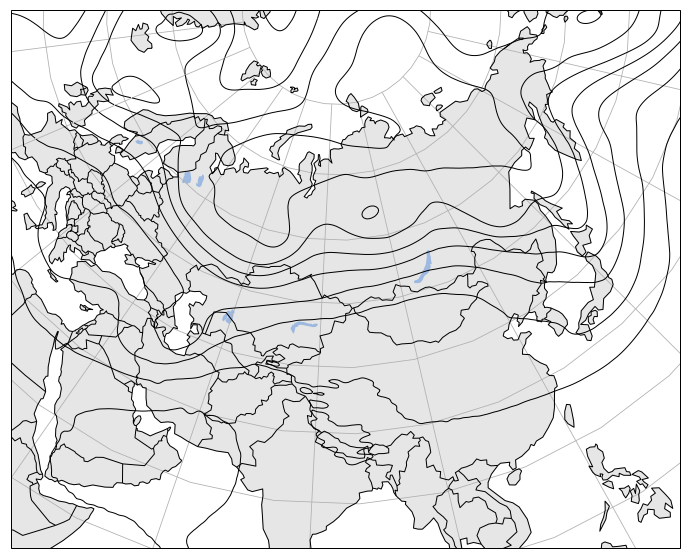

In [42]:
#Get a new background map figure
plt.rcParams['figure.figsize'] = (12, 12)
fig, ax = plotMap()

#Plot the 500-hPa height contours on the map, in black, with line width 1, and plot it above everything else.
hght_levels = np.arange(4000,6000,100)
ax.contour(lon, lat,hgt/9.8, colors='k', levels=hght_levels, linewidths=1, zorder=3, transform = ccrs.PlateCarree())

#Now plot absolute vorticity as filled contours underneath height field, only values above 1.5e-4 s-1, 
# and use the YlOrRd colormap.
avor_levels = np.linspace(15e-5,60e-5, 10)
#avor_contour = ax.contourf(lon, lat, avor, levels = avor_levels,  
#                           cmap=plt.cm.YlOrRd, zorder=2, transform = ccrs.PlateCarree())

#Show the figure
#fig

In [44]:
def plotMap1():
    #Set the projection information Cannot label gridlines on a LambertConformal plot. Only PlateCarree and Mercator plots are currently supported.
    proj = ccrs.PlateCarree(central_longitude=83.6)
    #Create a figure with an axes object on which we will plot. Pass the projection to that axes.
    fig, ax = plt.subplots(subplot_kw=dict(projection=proj))
    
    #Zoom in
    ax.set_extent([40, 130, 15, 90])# TaZhong:83.63,39.04
    
    #Add map features
    ax.add_feature(cfeature.LAND, facecolor='0.9') #Grayscale colors can be set using 0 (black) to 1 (white)
    ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.BORDERS, zorder=10, linestyle=':')
    ax.add_feature(cfeature.COASTLINE, zorder=10, linestyle=':')
    
    #We can use additional features from Natural Earth (http://www.naturalearthdata.com/features/)
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m',facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
    
    #Add lat/lon gridlines every 20° to the map
    gl= ax.gridlines(draw_labels=True,linewidth=2, color='gray', alpha=0.5, linestyle='--') 
    
    return fig, ax, gl

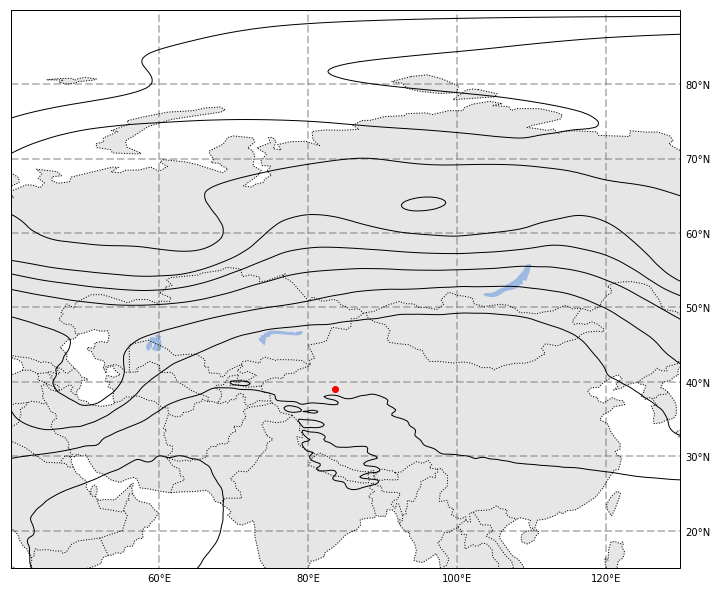

In [45]:
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#Get a new background map figure
plt.rcParams['figure.figsize'] = (12, 12)
fig, ax,gl = plotMap1()

#Plot the 500-hPa height contours on the map, in black, with line width 1, and plot it above everything else.
hght_levels = np.arange(4500,6000,100)
ax.contour(lon, lat,hgt/9.8, colors='k', levels=hght_levels, linewidths=1, zorder=3, transform = ccrs.PlateCarree())
gl.xlabels_top = False
gl.ylabels_left = False
#gl.xlines = False
gl.xlocator = mticker.FixedLocator([40,60,80,100,120,140])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.xlabel_style = {'size': 15, 'color': 'gray'}
#gl.xlabel_style = {'color': 'gray', 'weight': 'bold'}
#Now plot absolute vorticity as filled contours underneath height field, only values above 1.5e-4 s-1, 
# and use the YlOrRd colormap.
#avor_levels = np.linspace(15e-5,60e-5, 10)
plt.plot(83.63,39.04,'ro', transform=ccrs.PlateCarree())

<a list of 43 text.Text objects>

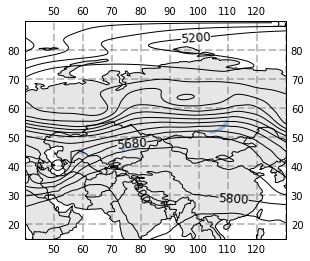

In [34]:
fig, ax,gl = plotMap1()

#Plot the 500-hPa height contours on the map, in black, with line width 1, and plot it above everything else.
hght_levels = np.arange(5200,5900,60)
hght_contour=ax.contour(lon, lat,hgt/9.8, colors='k', levels=hght_levels, linewidths=1, zorder=3, transform = ccrs.PlateCarree())

plt.clabel(hght_contour,hght_levels, inline=True, fmt='%1i', fontsize=12)

Text(84.03,39.34,'TZ')

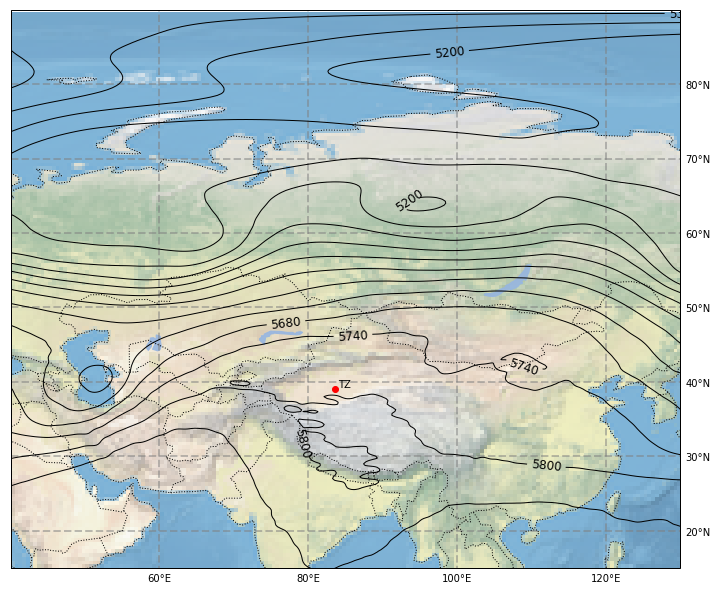

In [49]:
plt.rcParams['figure.figsize'] = (12, 12)
fig, ax,gl = plotMap1()
ax.stock_img()
#Plot the 500-hPa height contours on the map, in black, with line width 1, and plot it above everything else.
hght_levels = np.arange(5200,5900,60)
hght_contour=ax.contour(lon, lat,hgt/9.8, colors='k', levels=hght_levels, linewidths=1, zorder=3, transform = ccrs.PlateCarree())
gl.xlabels_top = False
gl.ylabels_left = False
#gl.xlines = False
gl.xlocator = mticker.FixedLocator([40,60,80,100,120,140])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.xlabel_style = {'size': 15, 'color': 'gray'}
#gl.xlabel_style = {'color': 'gray', 'weight': 'bold'}
#Now plot absolute vorticity as filled contours underneath height field, only values above 1.5e-4 s-1, 
# and use the YlOrRd colormap.
#avor_levels = np.linspace(15e-5,60e-5, 10)
plt.clabel(hght_contour,hght_levels, inline=True, fmt='%1i', fontsize=12)
plt.plot(83.63,39.04,'ro', transform=ccrs.PlateCarree())
plt.text(84.03,39.34, 'TZ',
         horizontalalignment='left',
         transform=ccrs.Geodetic())